## Bank Churn Prediction

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import KFold


In [2]:
df = pd.read_csv("BankCustomerData.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "churn"]

categorical_variables

['country',
 'gender',
 'tenure',
 'products_number',
 'credit_card',
 'active_member']

In [7]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "customer_id"]
numeric_variables

['credit_score', 'age', 'balance', 'estimated_salary']

In [8]:
df["churn"].value_counts()

,count
churn,
0,7963
1,2037


In [9]:
exit = df.loc[df["churn"]==1]
not_exit = df.loc[df["churn"]==0]

In [10]:
not_exit.shape
#exit.shape

(7963, 12)

In [11]:
def get_sorted_value_counts(df, column_name):
    return df[column_name].value_counts().sort_values()

print('Tenure frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "tenure"))
print(get_sorted_value_counts(exit, "tenure"))

print('Number of products frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "products_number"))
print(get_sorted_value_counts(exit, "products_number"))

print('credit card frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "credit_card"))
print(get_sorted_value_counts(exit, "credit_card"))

print('If active based frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "active_member"))
print(get_sorted_value_counts(exit, "active_member"))

print('country frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "country"))
print(get_sorted_value_counts(exit, "country"))

print('gender frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "gender"))
print(get_sorted_value_counts(exit, "gender"))


Tenure frequency of the churned and not churned groups
tenure
0     318
10    389
9     771
6     771
4     786
3     796
5     803
1     803
8     828
2     847
7     851
Name: count, dtype: int64
tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64
Number of products frequency of the churned and not churned groups
products_number
3      46
1    3675
2    4242
Name: count, dtype: int64
products_number
4      60
3     220
2     348
1    1409
Name: count, dtype: int64
credit card frequency of the churned and not churned groups
credit_card
0    2332
1    5631
Name: count, dtype: int64
credit_card
0     613
1    1424
Name: count, dtype: int64
If active based frequency of the churned and not churned groups
active_member
0    3547
1    4416
Name: count, dtype: int64
active_member
1     735
0    1302
Name: count, dtype: int64
country frequency of the churned and not churned groups
country
Germany    169

# Data Preprocessing

In [15]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


There are no missing values in this dataset

In [16]:
for var in numeric_variables:
    low_quantile = 0.05
    up_quantile = 0.95
    for col in [var]:
        quantile_one = df[col].quantile(low_quantile)
        quantile_three = df[col].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        up_limit = quantile_three + 1.5 * interquantile_range
        low_limit = quantile_one - 1.5 * interquantile_range

        outliers = (df[col] > up_limit) | (df[col] < low_limit)
        number_of_outliers = outliers.sum()
        if number_of_outliers > 0:
            print(col, ":", number_of_outliers, "outliers")
        else:
            print('No outliers')



No outliers
No outliers
No outliers
No outliers


There are no outliers in this dataset

In [17]:
# Variables to apply one hot encoding
list = ["gender", "country"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [18]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male,country_Germany,country_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


# Scalling

In [19]:
df = df.drop(["customer_id"], axis = 1)

In [20]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)

# Modeling

In [21]:
X = df.drop("churn",axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Accuracy: 0.8300 Precision: 0.6109 Recall: 0.3715 F1: 0.4620 ROC-AUC: 0.7604


array([[1514,   93],
       [ 247,  146]])

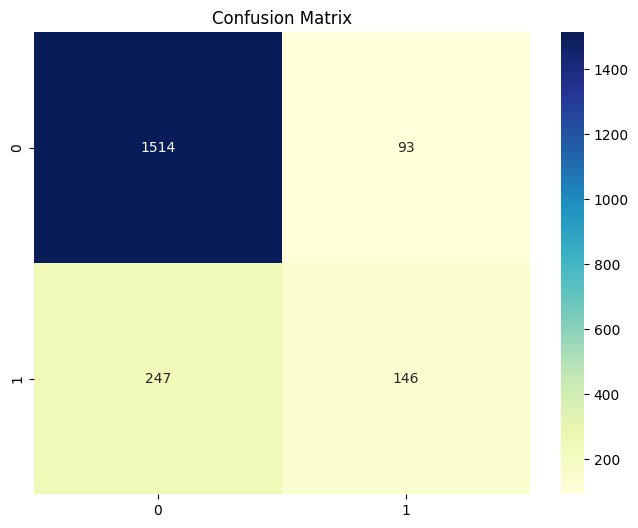

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifier_results function
def classifier_results(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, zero_division=0)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print("Accuracy: {:.4f} Precision: {:.4f} Recall: {:.4f} F1: {:.4f} ROC-AUC: {:.4f}".format(
        accuracy, precision, recall, f1, roc_auc))

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion, cmap='YlGnBu', annot=True, fmt='d')
    ax.set_title('Confusion Matrix')

    return confusion

# Prepare the data
X = df.drop("churn", axis=1)
y = df["churn"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Call evaluation function
classifier_results(y_test, y_pred, y_pred_proba)
